# TME 8 - Explication des exceptions

Travail réalisé par :
* BENHADDAD Sabrina
* BENSIDHOUM Azzedine

In [1]:
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.inspection import DecisionBoundaryDisplay

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', {'legend.frameon':True, 'legend.facecolor': 'white'})

## 1. Génération de gaussiennes

Dans cette partie, nous allons générer quelques gaussiennes ainsi que des exceptions.

Comme demandé dans l'énoncé, nous allons générer une base artificielle similaire à celles du transparent 12 du cours

In [2]:
x,y = make_blobs(n_samples = 500, centers = 4, n_features = 2, cluster_std = 0.8,random_state=45)

In [3]:
x.shape

(500, 2)

In [ ]:
y

In [ ]:
x

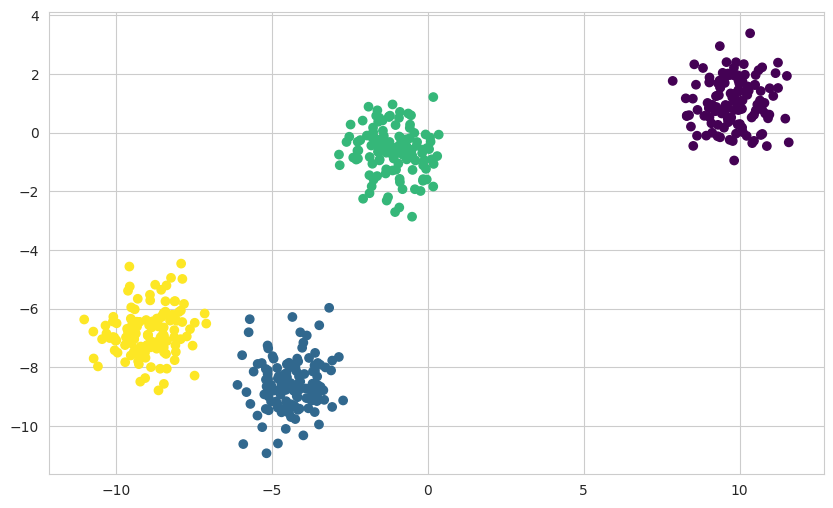

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1], c = y, cmap = 'viridis')

Après avoir généré les gaussiennes, nous allons insérer manuellement des exceptions

In [5]:
outliers_gen = [[2, -2.5],[10,-4],[-10,-2],[0,-9]]
labels_gen = [2,0,3,1]

In [6]:
X_out = np.vstack([x, outliers_gen])
y_out= np.concatenate([y, labels_gen])

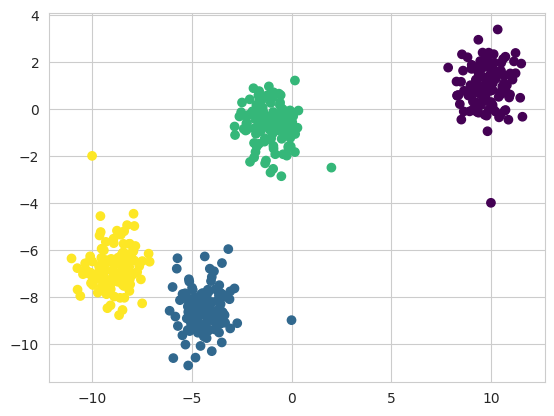

In [7]:
plt.scatter(X_out[:,0],X_out[:,1], c = y_out, cmap = 'viridis')

## 2. Détection d'exceptions avec scikit-learn


### A. Isolation forest

In [8]:
clf=IsolationForest(n_estimators=100,max_samples='auto',contamination=0.3,random_state=np.random.RandomState(42))
clf.fit(X_out)
y_iso_pred = clf.predict(X_out)

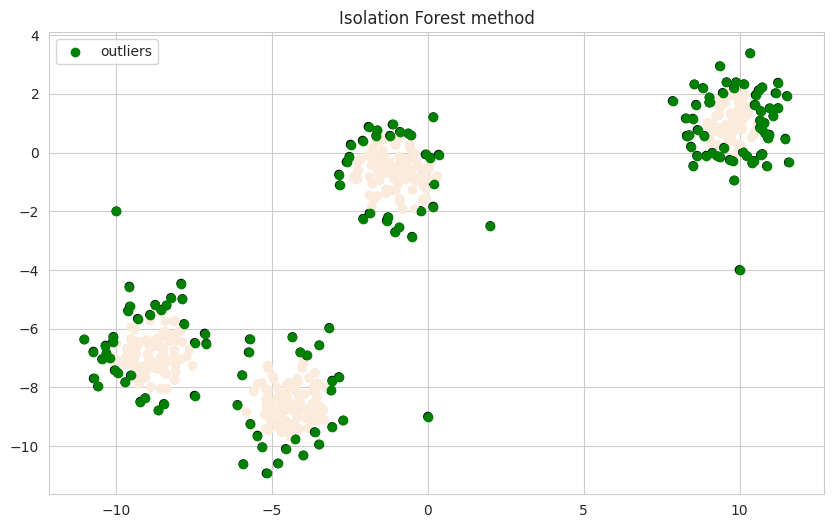

In [9]:
outliers_index = np.where(y_iso_pred==-1)

plt.figure(figsize=(10,6))
plt.scatter(X_out[:, 0], X_out[:, 1], c= y_iso_pred)

plt.scatter(X_out[outliers_index,0],X_out[outliers_index,1], c='green',label="outliers")
plt.title("Isolation Forest method")
plt.legend()

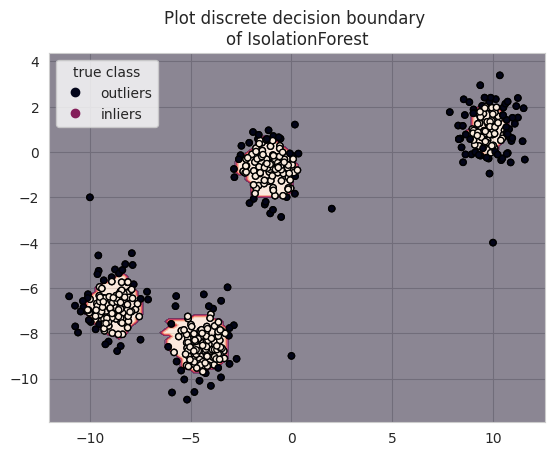

In [10]:
#Plot descrete decision boundaries
display = DecisionBoundaryDisplay.from_estimator(
    clf,
    X_out,
    response_method="predict",
    alpha=0.5,
)

scatter = plt.scatter(X_out[:, 0], X_out[:, 1], c=y_out, s=20, edgecolor="k")
handles, labels = scatter.legend_elements()

display.ax_.scatter(X_out[:, 0], X_out[:, 1], c=y_iso_pred, s=20, edgecolor="k")
display.ax_.set_title("Plot discrete decision boundary \nof IsolationForest")
plt.legend(handles=handles,labels=["outliers", "inliers"], title="true class")

plt.show()

Text(0.5, 1.0, 'Path length decision boundary \nof IsolationForest')

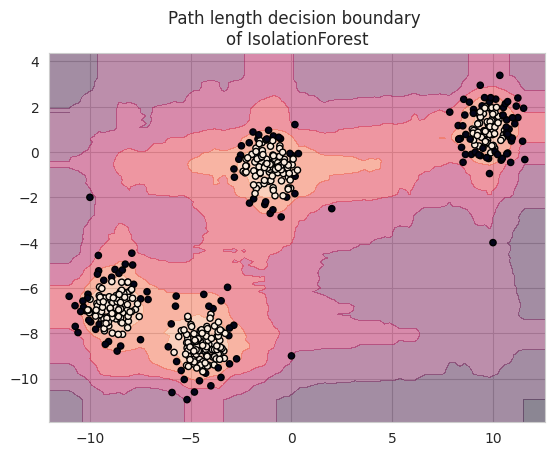

In [11]:
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X_out,
    response_method="decision_function",
    alpha=0.5,
)
disp.ax_.scatter(X_out[:, 0], X_out[:, 1], c=y_iso_pred, s=20, edgecolor="k")
disp.ax_.set_title("Path length decision boundary \nof IsolationForest")

In [12]:
print("Accuracy of the model:", accuracy_score(y_out, y_iso_pred)*100)

Accuracy of the model: 19.841269841269842


Commentaire sur la méthode :     

Le score dépend du paramètre de contamination fourni lors de l'entraînement du modèle. Cela implique que nous devrions avoir une idée du pourcentage de données qui est anormal au préalable pour obtenir une meilleure prédiction.

### B. One-class SVM


In [13]:
svm = OneClassSVM(kernel ='rbf',gamma='auto', nu=0.2)
svm.fit(X_out)
y_svm = svm.predict(X_out)

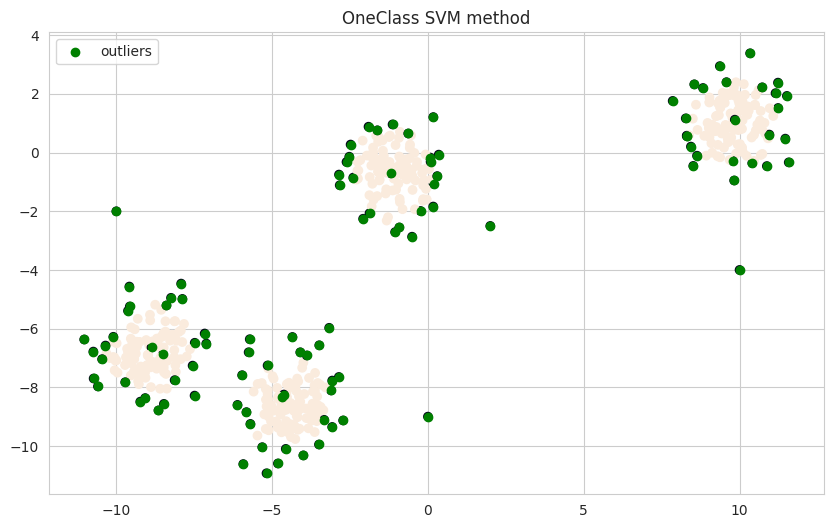

In [14]:
svm_index = np.where(y_svm==-1)
plt.figure(figsize=(10,6))
plt.scatter(X_out[:, 0], X_out[:, 1], c= y_svm)

plt.scatter(X_out[svm_index,0],X_out[svm_index,1], c='green',label="outliers")
plt.title("OneClass SVM method")
plt.legend()

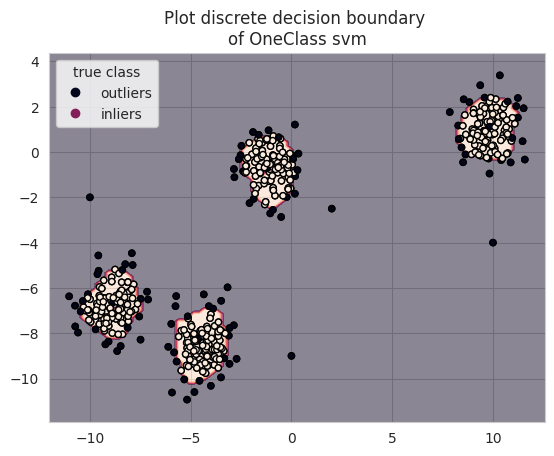

In [15]:
#Plot descrete decision boundaries
display = DecisionBoundaryDisplay.from_estimator(
    svm,
    X_out,
    response_method="predict",
    alpha=0.5,
)

scatter = plt.scatter(X_out[:, 0], X_out[:, 1], c=y_out, s=20, edgecolor="k")
handles, labels = scatter.legend_elements()

display.ax_.scatter(X_out[:, 0], X_out[:, 1], c=y_svm, s=20, edgecolor="k")
display.ax_.set_title("Plot discrete decision boundary \nof OneClass svm")
plt.legend(handles=handles,labels=["outliers", "inliers"], title="true class")

plt.show()

Text(0.5, 1.0, 'Path length decision boundary \nof OneClass SVM')

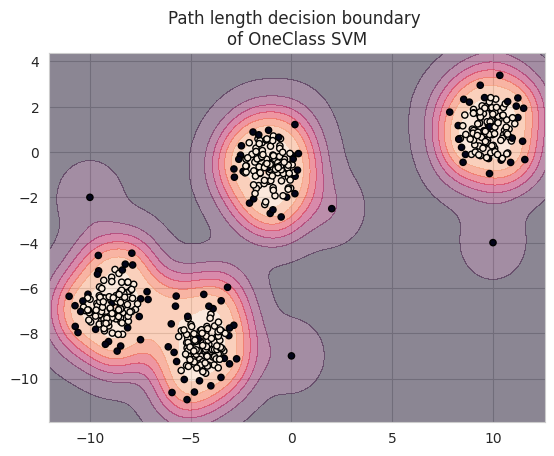

In [16]:
disp = DecisionBoundaryDisplay.from_estimator(
    svm,
    X_out,
    response_method="decision_function",
    alpha=0.5,
)
disp.ax_.scatter(X_out[:, 0], X_out[:, 1], c=y_svm, s=20, edgecolor="k")
disp.ax_.set_title("Path length decision boundary \nof OneClass SVM")

In [22]:
print("Accuracy of the model:", accuracy_score(y_out, y_svm)*100)

Accuracy of the model: 19.444444444444446


Commentaire :      
Le One-Class SVM est très sensible aux paramètres, en particulier le paramètre de régularisation (nu) et le choix du noyau (kernel). Un mauvais choix de ces paramètres peut conduire à des performances médiocres, avec soit trop d'anomalies détectées, soit pas assez.

### C. Local Outlier Factor

In [17]:
lof = LocalOutlierFactor(n_neighbors = 10, novelty = True)
lof.fit(X_out)
y_lof = lof.predict(X_out)

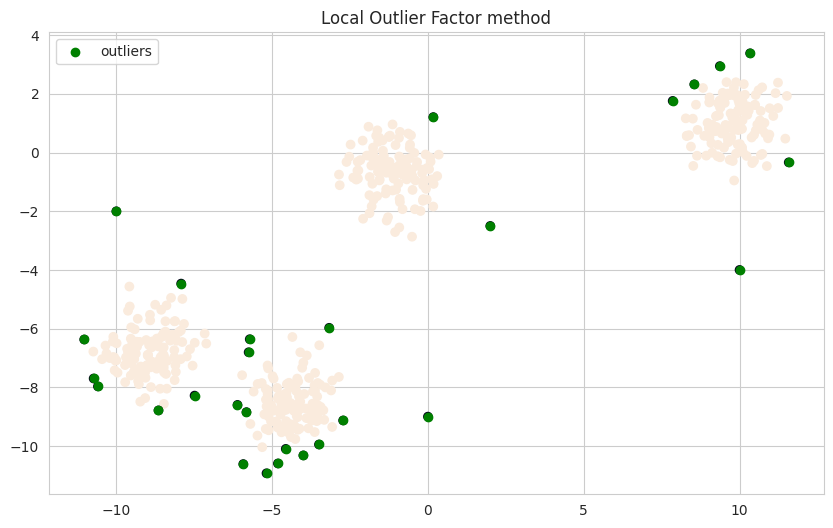

In [18]:
lofs_index = np.where(y_lof==-1)
plt.figure(figsize=(10,6))
plt.scatter(X_out[:, 0], X_out[:, 1], c= y_lof)

plt.scatter(X_out[lofs_index,0],X_out[lofs_index,1], c='green',label="outliers")
plt.title("Local Outlier Factor method")
plt.legend()

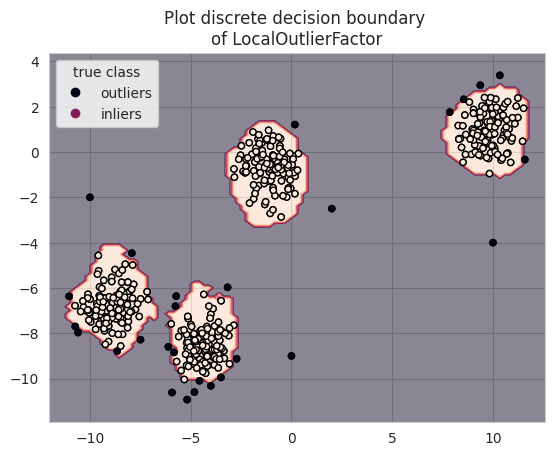

In [19]:
#Plot descrete decision boundaries
display = DecisionBoundaryDisplay.from_estimator(
    lof,
    X_out,
    response_method="predict",
    alpha=0.5,
)

scatter = plt.scatter(X_out[:, 0], X_out[:, 1], c=y_out, s=20, edgecolor="k")
handles, labels = scatter.legend_elements()

display.ax_.scatter(X_out[:, 0], X_out[:, 1], c=y_lof, s=20, edgecolor="k")
display.ax_.set_title("Plot discrete decision boundary \nof LocalOutlierFactor")
plt.legend(handles=handles,labels=["outliers", "inliers"], title="true class")

plt.show()

Text(0.5, 1.0, 'Path length decision boundary \nof LocalOutlierFactor')

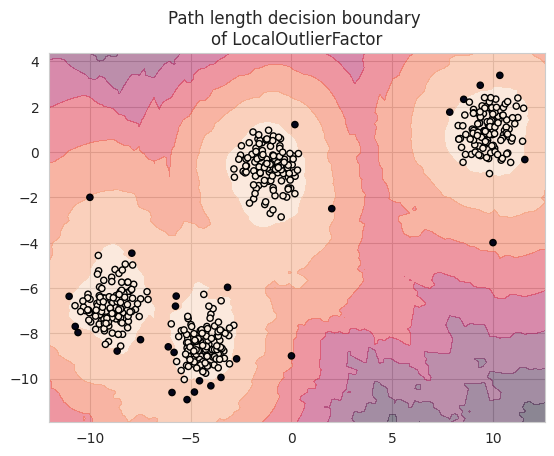

In [20]:
disp = DecisionBoundaryDisplay.from_estimator(
    lof,
    X_out,
    response_method="decision_function",
    alpha=0.5,
)
disp.ax_.scatter(X_out[:, 0], X_out[:, 1], c=y_lof, s=20, edgecolor="k")
disp.ax_.set_title("Path length decision boundary \nof LocalOutlierFactor")

In [21]:
print("Accuracy of the model:", accuracy_score(y_out, y_lof)*100)

Accuracy of the model: 22.42063492063492


Commentaire sur la méthode :     

Le score dépend fortement des paramètres tels que le nombre de voisins (k). Choisir la bonne valeur de k est crucial et peut être difficile, car une valeur trop petite peut rendre l'algorithme sensible au bruit, tandis qu'une valeur trop grande peut l'empêcher de détecter des anomalies locales.

Petite conclusion :          

Isolation Forest excelle dans la gestion de grands ensembles de données avec une complexité computationnelle relativement faible, mais nécessite une estimation du pourcentage d'anomalies. Le LOF est efficace pour détecter les anomalies dans un contexte local, bien qu'il soit moins performant dans des espaces à haute dimensionnalité, tandis que le One-Class SVM est puissant pour capturer la structure globale des données normales, mais est sensible aux choix des paramètres et peut être coûteux en calcul.

## 3. Explications naives

### A. Approche contrefactuelle

DICE est une technique d'explication de modèle qui génère des contre-exemples contrefactuels pour expliquer les prédictions d'un modèle.

Dans ce qui ce suit, nous allons l'utiliser dans le cadre de l'explication d'anomalies.

Les anomalies seront détectées grâce à la méthode "Isolation Forest"

In [ ]:
#Installation de DICE
!pip install dice_ml

In [ ]:
import dice_ml

import pandas as pd

In [ ]:
#Détection des anomalies avec un isolation forest
clf = IsolationForest(n_estimators=100,max_samples='auto',contamination=0.3,random_state=np.random.RandomState(42))
clf.fit(X_out)
y_iso_pred = clf.predict(X_out)
y = (y_iso_pred + 1 )// 2

La ligne y = (anomalies + 1) // 2 transforme les étiquettes -1 et 1 en 0 et 1, respectivement.

Lorsque anomalies est -1 (anomalie), (anomalies + 1) devient 0, et la division entière par 2 (// 2) laisse 0.

Lorsque anomalies est 1 (normal), (anomalies + 1) devient 2, et la division entière par 2 (// 2) donne 1.

Cette transformation est nécessaire pour que les étiquettes soient dans le format correct pour être utilisées par le RandomForestClassifier.

Nous choisissons le classifieur "RandomForest" car ce modèle facilite la compréhension des contre-exemples générés par DICE

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_out,y)

RandomForestClassifier()

In [ ]:
#Les données pour DICE
data = pd.DataFrame(np.column_stack((X_out,y)),columns=["X1","X2","label"])
d = dice_ml.Data(dataframe=data,continuous_features=["X1","X2"],
                 outcome_name='label')

In [ ]:
model = dice_ml.Model(rf, backend="sklearn", model_type='classifier')

explainer = dice_ml.Dice(d,model, method = 'random')

In [ ]:
#Instance : anomalie à expliquer
anomaly_index = np.where(y == 0)[0][1]
anomaly = data[["X1","X2"]].iloc[anomaly_index]
# Transformer l'instance 'anomaly' en DataFrame
anomaly_df = anomaly.to_frame().transpose()  # Transposer pour avoir les colonnes X1, X2

x = anomaly_df

In [ ]:
x

,X1,X2
3,10.79978,1.012817


In [ ]:
counterfactuals = explainer.generate_counterfactuals(x,
                                                     total_CFs=1)

  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Rand

In [ ]:
counterfactuals.visualize_as_dataframe(show_only_changes=True)

Query instance (original outcome : 0)


,X1,X2,label
0,10.79978,1.012817,0



Diverse Counterfactual set (new outcome: 1)


,X1,X2,label
0,9.215748681,-,1.0


Selon l'analyse effectuée par l'algorithme DICE dans cet exemple, il apparaît que seule la modification de l'attribut X1 est nécessaire pour reclassifier l'instance d'anomalie à point normal.

Cela indique que X1 joue un rôle déterminant dans la manière dont le modèle identifie une anomalie.

En d'autres termes, une valeur de X1 significativement différente de la norme observée au sein de son cluster pourrait conduire à la classification de l'instance comme étant un point normal et non une anomalie.

Ainsi, la proximité de X1 par rapport au centre de son cluster est un critère essentiel pour la détection d'outliers par le modèle, ce qui est totalement logique.

### B. LIME

Dans cette partie, nous essayons d'expliquer les prédictions effectuées avec LIME.

Cet algorithme retourne en effet les vecteurs d'importance d'attributs, autrement dit, quels attributs ont contribué dans la prédiction.

In [ ]:
!pip install lime

In [26]:
#Détection des anomalies avec un isolation forest
clf = IsolationForest(n_estimators=100,max_samples='auto',contamination=0.3,random_state=np.random.RandomState(42))
clf.fit(X_out)
y_iso_pred = clf.predict(X_out)
y = (y_iso_pred + 1 )// 2

In [29]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_out,y)

RandomForestClassifier()

In [30]:
#Anomalie à expliquer
outlier_index = np.where(y == 0)
x = X_out[outlier_index][0]
x

array([9.03540917, 1.87968338])

In [ ]:
import lime
import lime.lime_tabular

In [ ]:
# Créer un expliquateur LIME pour des données tabulaires
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_out,
    feature_names=["X1","X2"],
    class_names=["label"],
    discretize_continuous=True
)

In [ ]:
# Générer une explication pour l'instance sélectionnée
exp = explainer.explain_instance(x, predict_fn=rf.predict_proba)

In [ ]:
# Afficher l'explication
exp.show_in_notebook(show_table=True, show_all=True)

Pour encore plus d'interprétabilité, nous allons essayer un autre algorithme d'explicabilité basé sur l'importance des attributs à savoir, SHAP

#### Test avec SHAP

SHAP est un algorithme particulièrement intéressant pour expliquer les outliers. En effet, ce dernier détermine la contribution de chaque attribut à une prédiction spécifique, et nous permettra donc, de mieux comprendre pourquoi certaines instances sont classées comme anomalies.

In [ ]:
!pip install shap

In [24]:
import shap

Pour la suite, nous allons comme tout à l'heure, utiliser un Isolation Forest

In [31]:
explainer = shap.Explainer(clf)
shap_values = explainer(x)

In [32]:
shap_instance = explainer.shap_values(x)

In [33]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_instance, x)

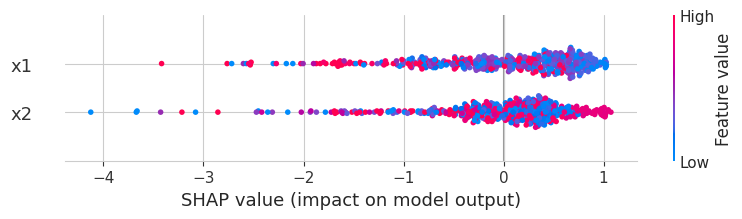

In [37]:
shap_values = shap.TreeExplainer(clf).shap_values(X_out)
shap.summary_plot(shap_values,X_out, feature_names = ["x1","x2"])

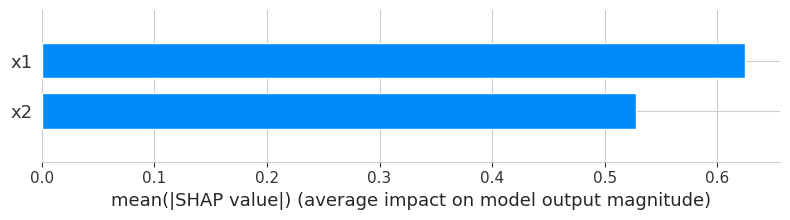

In [36]:
shap.summary_plot(shap_values, X_out,plot_type="bar",feature_names=["x1","x2"])

Nous pouvons constater que l'attribut X1 a bel et bien une importance significative quant au classement de cet exemple comme étant un outlier, ce qui s'aligne avec les résultats trouvés plus haut.

## 4. Explications moins naives - DIFFI & ABOD

L'objectif de cette section est de déployer des techniques d'explication plus sophistiquées, abordées en cours, pour expliquer les anomalies ou outliers. En effet, comme nous l'avons vu précédemment, les méthodes d'explication plus naïves, qu'il s'agisse de vecteurs d'importance d'attributs ou d'approches contre-factuelles, ne fournissent pas d'explications suffisamment robustes. Ces méthodes peuvent se révéler inadéquates pour les modèles de détection d'anomalie, nécessitant donc l'exploration d'approches plus avancées et appropriées à ces contextes spécifiques.


### ABOD

ABOD (Angle-Based Outlier Detection) est une technique avancée pour la détection d'outliers qui se concentre sur l'angle plutôt que sur la distance ou la densité des points de données. Cette méthode est particulièrement utile pour identifier les outliers dans des ensembles de données à haute dimension. Voici comment ABOD fonctionne :

1. **Principe de Base** :
   - ABOD estime le degré d'outlier d'un point en analysant la variance des angles entre les paires de points. L'idée est que les points normaux auront une variance angulaire plus grande avec d'autres points, tandis que les outliers auront une variance angulaire plus petite car ils sont plus isolés.

2. **Calcul des Angles** :
   - Pour chaque point de données, ABOD calcule les angles entre ce point et toutes les paires de points restants. Plus précisément, pour un point donné, elle considère cet angle comme l'angle entre les vecteurs formés par ce point et chaque paire d'autres points.

3. **Estimation de l'Outlier** :
   - Une fois tous les angles calculés, ABOD évalue leur variance. Les points avec une faible variance angulaire sont considérés comme des outliers. En effet, une faible variance signifie que le point est positionné de manière à former des angles similaires avec de nombreuses paires d'autres points, indiquant qu'il est éloigné de la région de forte densité.

L'un des avantages de cette méthode est qu'elle est relativement rapide et efficace, car elle ne nécessite que le calcul des angles et n'implique aucun calcul de distance. Cependant, elle est sensible à la présence de bruit ou d'erreurs dans les données, et n'est pas toujours la méthode la plus efficace pour détecter les anomalies.

Les implémentations qui suivent ont été inspirées du blog suivant : https://blog.paperspace.com/outlier-detection-with-abod/

In [38]:
!pip install pyod

In [39]:
from pyod.utils.data import generate_data

X_train, Y_train = generate_data(
                                    n_train=150,
                                    n_features=2,
                                    train_only=True,
                                    contamination=0.1,
                                    random_state=42
                                 )

x1, x2 = X_train[:,0], X_train[:,1]

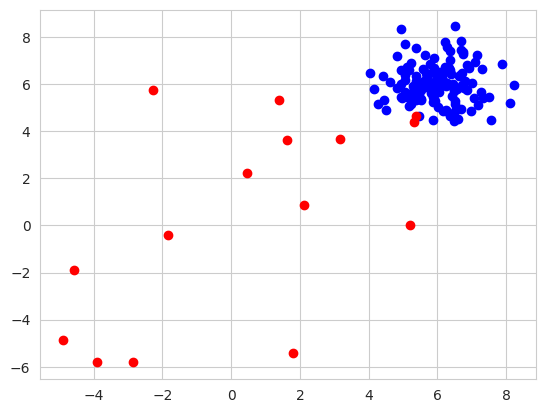

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

for idx, i in enumerate(Y_train):
  if i==0.0:
    color='blue'
  else:
    color='red'
  plt.scatter(x1[idx], x2[idx], c=color)

In [42]:
from pyod.models.abod import ABOD

abod_model = ABOD(contamination=0.1, method='fast', n_neighbors=10)
abod_model.fit(X_train)

pred = abod_model.predict(X_train)

error = (pred != Y_train).sum()
print (f'Error % = {(error/len(pred))*100}')

Error % = 2.666666666666667


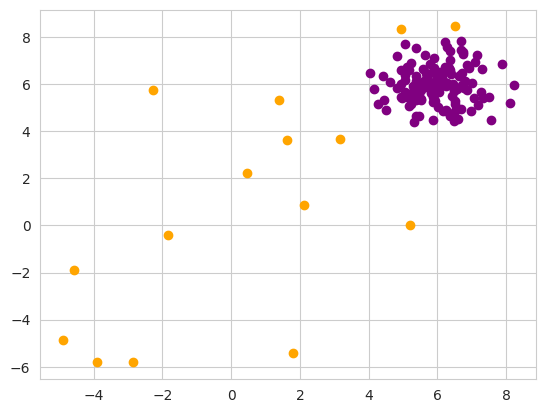

In [43]:
for idx, i in enumerate(pred):
  if i==0.0:
    color='purple'
  else:
    color='orange'
  plt.scatter(x1[idx], x2[idx], c=color)

Nous pouvons voir dans cette figure, que les points oranges sont les outliers tandis que les points violets sont les points normaux du cluster.

Nous constatons néanmoins 4 erreurs puisque nous avons 2 faux négatifs et 2 faux positifs.

### DIFFI
La méthode DIFFI (DIstribution-Free Finite Imputation) est une approche statistique utilisée pour gérer les données manquantes de base.

 Dans notre cas, elle va nous permettre l'agrégation de la fonction d'utilisation des attributs dans une forêt aléatoire, cela va nous permettre d'analyser les outliers. Par exemple, si certains attributs apparaissent régulièrement à des profondeurs faibles dans les arbres utilisés pour leurs classement en outliers, cela peut indiquer que ces attributs sont significatifs pour identifier les anomalies.

In [ ]:
### Download GitHub code
import requests
from pathlib import Path

# Donwload the DIFFI code (if it's not already downloaded)
def donwload_file(path, raw_path):
  if Path(path).is_file():
    print(path, ' already exists, skipping download')
  else:
    request = requests.get(raw_path)
    with open(path, "wb") as f:
      f.write(request.content)

donwload_file('interpretability_module.py', 'https://raw.githubusercontent.com/mattiacarletti/DIFFI/master/interpretability_module.py')
donwload_file('utils.py', 'https://raw.githubusercontent.com/mattiacarletti/DIFFI/master/utils.py')
donwload_file('sklearn_mod_functions.py', 'https://raw.githubusercontent.com/mattiacarletti/DIFFI/master/sklearn_mod_functions.py')

interpretability_module.py  already exists, skipping download
utils.py  already exists, skipping download
sklearn_mod_functions.py  already exists, skipping download


In [ ]:
import interpretability_module as interp
from utils import *

In [ ]:
y_tr_pred = np.array(clf.predict(X_out) < 0).astype('int')
print('Detected anomalies: {} out of {}'.format(int(sum(y_tr_pred)), len(y_tr_pred)))

Detected anomalies: 151 out of 504


In [ ]:
# redefinition de la fonction plot_ranking_glass pour éviter l'erreur de l'originale
def plot_ranking_glass(ord_idx, title):
    sns.set(style='darkgrid')
    id2feat = {0:'RI', 1:'Na', 2:'Mg', 3:'Al', 4:'Si', 5:'K', 6:'Ca', 7:'Ba', 8:'Fe'}
    num_feats = ord_idx.shape[1]
    features = np.arange(num_feats)
    ranks = np.arange(1, num_feats+1)
    rank_features = {r: [list(ord_idx[:,r-1]).count(f) for f in features] for r in ranks}
    df = pd.DataFrame(rank_features)
    df_norm = df.transform(lambda x: x/sum(x))
    df_norm['Feature ID'] = features
    df_norm['Feature'] = df_norm['Feature ID'].map(id2feat)
    df_norm.drop(['Feature ID'], inplace=True, axis=1)
    df_norm.set_index('Feature').T.plot(kind='bar', stacked=True)

Average computational time Local-DIFFI: 0.032


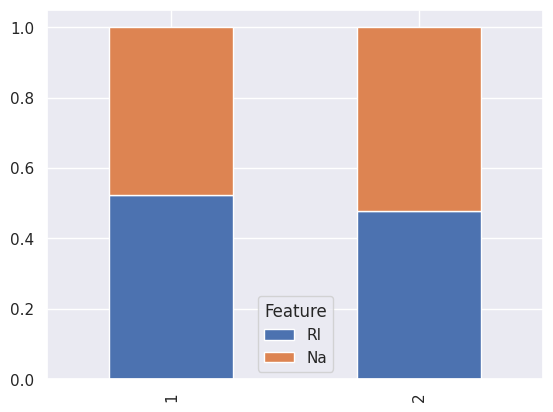

In [ ]:
# Local-DIFFI
X_ = X_out[np.where(y_tr_pred == 1)]

clf.max_samples = X_.shape[0]  # Number of samples in X_

n_samples = X_.shape[0]  # Number of samples in X_
max_samples = min(256, n_samples)  # Resolve 'auto' to actual number
# Now use max_samples to calculate max_depth
max_depth = int(np.ceil(np.log2(max_samples)))

diffi_tr, ord_idx_diffi_tr, exec_time_diffi_tr = local_diffi_batch(clf, X_)
plot_ranking_glass(ord_idx_diffi_tr, title = 'Feature ranking - Local DIFFI')
print('Average computational time Local-DIFFI: {}'.format(round(np.mean(exec_time_diffi_tr),3)))